**Alunos:**
*   Daniel Augusto Muller
*   Luan Escudeiro

**Trabalho 1**

1 - Crie sua própria base de dados de regressão. A mesma deve conter:

    2 features/variáveis independentes (reais ou inteiros)

    1 variável independente (reais ou inteiros)

    possuir no mínimo 30 amostras

2 - Crie 10 otimizadores lineares do tipo x1*w1+x2*w2+b = 0. 
(Os pesos devem ser escolhidos randomicamente)

3 - Avalie e descubra quais dos 10 otimizadores tem menor erro

Calcule as métricas MSE e MAE, comparando os valores estimados com os valores reais

4 - Plote a superfície de erro real e a melhor superfície de erro estimada

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import numpy as np
from random import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error #mean_squared_error(y,y_pred, squared=False)
from sklearn.metrics import mean_absolute_error #mean_absolute_error(y,y_pred)

**My RSME and MAE functions**

In [6]:
def my_RSME(y, y_pred):
  RSME = np.sqrt(np.sum((y-y_pred)**2)/len(y))
  return RSME

def my_MAE(y, y_pred):
  MAE = np.sum(np.absolute(y-y_pred))/len(y)
  return MAE

**Predicting BodyFatness with Weight and Abdomen Circumference**

In [7]:
df = pd.read_csv('/content/drive/MyDrive/UTFPR/Períodos/2022.2/Sistemas_Inteligentes/Colab Notebooks/bodyfat.csv')

df['Weight'] = df['Weight'].div(2.205).round(2) #lbs to kg
#print(df.head()) #252 samples

X = df.iloc[:,[3,7]].values #all rows but only columns Weight(kg) and Abdomen Circumference(cm)
print("X:",X.shape,"\nWeight(kg) Abdomen(cm)\n",X[:5],"...") #ispection of first 5 rows
y_true = df['BodyFat'].values
print("\ny_true:",y_true.shape,"\n Body Fatness(%)\n",y_true[:5],"...")

X: (252, 2) 
Weight(kg) Abdomen(cm)
 [[ 69.95  85.2 ]
 [ 78.57  83.  ]
 [ 69.84  87.9 ]
 [ 83.79  86.4 ]
 [ 83.56 100.  ]] ...

y_true: (252,) 
 Body Fatness(%)
 [12.3  6.1 25.3 10.4 28.7] ...


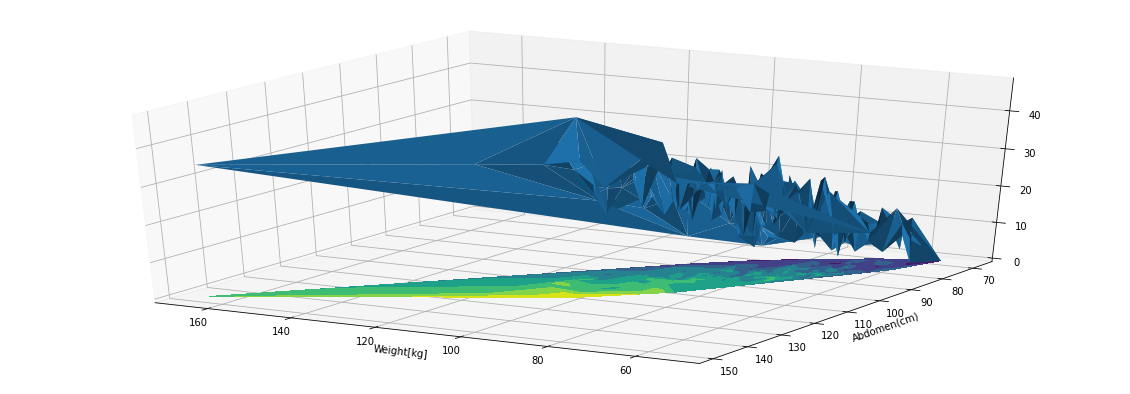

In [8]:
fig = plt.figure(figsize=(20,7))
ax = fig.gca(projection='3d')
ax.plot_trisurf(X[:,0], X[:,1], y_true)

ax.view_init(elev=30, azim=120)
ax.tricontourf(X[:,0], X[:,1], y_true, zdir='z', offset=0)

plt.xlabel("Weight[kg]")
plt.ylabel("Abdomen(cm)")
plt.show()

**3D View**

In [9]:
points2D = np.vstack([X[:,0],X[:,1]]).T
from scipy.spatial import Delaunay

tri = Delaunay(points2D)
simplices = tri.simplices

import plotly.figure_factory as ff

fig = ff.create_trisurf(X[:,0], X[:,1], y_true, simplices=simplices, aspectratio=dict(x=1, y=1, z=0.3))
fig.show()

In [10]:
from random import randint
w1=[]
w2=[]
b=[]
for i in range(10):
  w1.append(round((randint(-10, 10)+random()),2))
  w2.append(round((randint(-10, 10)+random()),2))
  b.append(round((randint(-10, 10)+random()),2))

print("w1:",w1)
print("w2:",w2)
print("b:",b)

w1: [-7.94, -2.68, 8.16, 7.23, 7.59, -5.81, -1.48, 4.7, 0.25, 5.72]
w2: [-0.35, -2.34, -3.28, -1.27, 2.51, 6.53, -2.82, -3.88, 8.54, -1.22]
b: [0.56, -6.6, -6.04, 6.14, 7.74, 6.84, -4.55, 10.31, -5.0, -5.55]


In [11]:
RSME=[]
MAE=[]
y_pred=[]
for i in range(10):
  for y in range(len(y_true)):
    y_pred.append((X[y][0]*w1[i] + X[y][1]*w2[i] + b[i]).round(1)) #X1*w1 + X2*w2 + b
  RSME.append(round(mean_squared_error(y_true,y_pred, squared=False),2))
  MAE.append(round(mean_absolute_error(y_true,y_pred),2))
  y_pred=[]

In [12]:
print("RSME:",RSME)
print("MAE: ",MAE)

RSME: [704.61, 464.43, 341.75, 463.05, 845.38, 125.39, 408.56, 34.55, 791.5, 332.08]
MAE:  [695.27, 459.8, 333.37, 456.12, 836.8, 120.77, 404.8, 25.49, 786.57, 326.53]


In [13]:
#return the index of minimum value 
min_RSME_index = RSME.index(min(RSME))
print("Min. RSME Error:",min(RSME),"\nMin. RSME Error Index:",min_RSME_index)
min_MAE_index = MAE.index(min(MAE))
print("\nMin. MAE Error:",min(MAE),"\nMin. MAE Error Index:",min_MAE_index)

Min. RSME Error: 34.55 
Min. RSME Error Index: 7

Min. MAE Error: 25.49 
Min. MAE Error Index: 7


In [14]:
X1 = X[:,0]
X2 = X[:,1]
print("Best Function: X1 *",w1[min_RSME_index],"+ X2 *",w2[min_RSME_index],"+",b[min_RSME_index],"= 0")

Best Function: X1 * 4.7 + X2 * -3.88 + 10.31 = 0


**Plotting Error Surface**

In [15]:
y_pred = w1[min_RSME_index]*X[:,0] + w2[min_RSME_index]*X[:,1] - b[min_RSME_index]

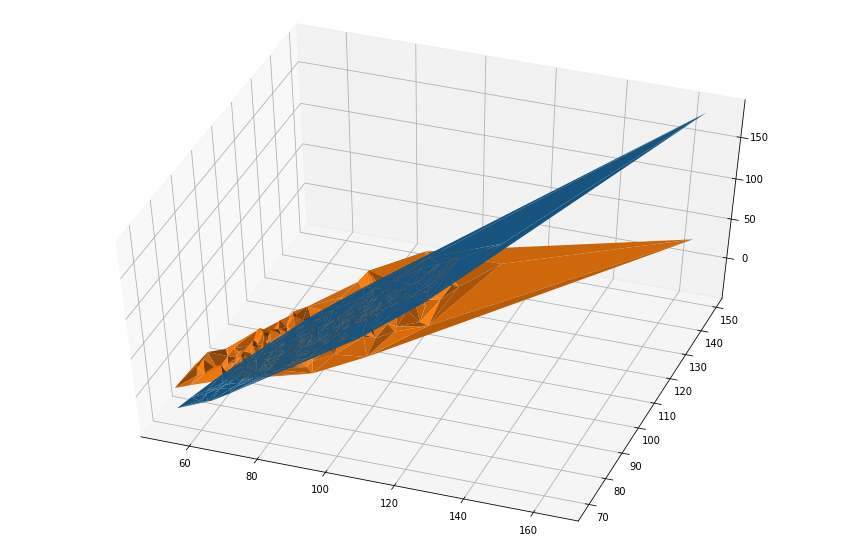

In [20]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')
ax.plot_trisurf(X1, X2, y_pred)
ax.plot_trisurf(X1, X2, y_true)

ax.view_init(elev=50, azim=-70)

plt.show()